### Import packages

In [1]:
library(GWmodel)      ### GW models
library(dplyr)
library(sp)           ## Data management
library(car)          ## vif
library(spdep)        ## Spatial autocorrelation
library(RColorBrewer) ## Visualization
library(classInt)     ## Class intervals
library(raster)       ## spatial data
library(grid)         # plot
library(gridExtra)    # Multiple plot
library(ggplot2)      # Multiple plot
library(gtable)
library(GGally)       # 相關係數圖矩陣（scatter plot matrix）
library(maptools)
library(MASS)
library(tmap)

載入需要的套件：maptools

載入需要的套件：sp

Checking rgeos availability: TRUE

載入需要的套件：robustbase

載入需要的套件：Rcpp

載入需要的套件：spatialreg

載入需要的套件：spData

載入需要的套件：Matrix

載入需要的套件：sf

Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1

Welcome to GWmodel version 2.2-8.


載入套件：'dplyr'


下列物件被遮斷自 'package:stats':

    filter, lag


下列物件被遮斷自 'package:base':

    intersect, setdiff, setequal, union


載入需要的套件：carData


載入套件：'car'


下列物件被遮斷自 'package:dplyr':

    recode



載入套件：'spdep'


下列物件被遮斷自 'package:spatialreg':

    aple, aple.mc, aple.plot, as.spam.listw, as_dgRMatrix_listw,
    as_dsCMatrix_I, as_dsCMatrix_IrW, as_dsTMatrix_listw,
    can.be.simmed, cheb_setup, create_WX, do_ldet, eigen_pre_setup,
    eigen_setup, eigenw, errorsarlm, get.ClusterOption,
    get.coresOption, get.mcOption, get.VerboseOption,
    get.ZeroPolicyOption, GMargminImage, GMerrorsar, griffith_sone,
    gstsls, Hausman.test, impacts, intImpacts, invIrM, invIrW,
    Jacobian_W, jacobianSetup, l_max, lagmess, lagsarlm, lextrB,
    lextrS

### Function

#### pdf_plot

In [2]:

pdf_plot <- function(x){
  g = ggplot()+
    geom_histogram(aes(x = x, y = ..density..), 
                   fill = '#557C55', alpha = 0.8)+
    geom_density(aes(x = x, y = ..density..), 
                 color = '#062C30', size = 1)+
    theme_bw()
  
  return(g)
}


### Load datas

In [3]:
getwd()
path = '..\\..\\Roaming-Dogs-Data\\'
Variable_KS_df <- read.csv(paste0(path, "@Test_KS\\Variable.csv" ), fileEncoding = 'utf-8')
Variable_KS_shp<-shapefile(paste0(path, "@Test_KS\\Variable.shp" ),warnPRJ = F)

[1] "c:/@@Roaming_Dogs_Data_Analysis/Roaming-Dogs-Code/Model-fitting"

In [4]:
Variable_KS_df["Clinic"][is.na(Variable_KS_df["Clinic"])] = 0

### select Xy

In [5]:
col_X = c( "Market","Cluster","high_rat",   "mid_rat","low_rat","Hospital" ,  "Clinic", "M_F_RAT" ,
           "P_DEN",      "DEPENDENCY", "YOUN_DEP",   "OLD_DEP",    "AGING_IDX","Ele" ,"Ele_stu","Junior" ,   
           "Junior_stu", "Senior",     "Senior_stu", "TaxPayer" ,  "Income_tot", "Income_mea",
           "Income_med" ,"Income_Q1",  "Income_Q3",  "Income_sta", "Income_CV",  "Temple",    
           "Train.stat", "Train.crow" )
col_y = c('Nt')

In [6]:
crs(Variable_KS_shp)  <-  CRS('+init=EPSG:4326')
(crs(Variable_KS_shp))

CRS arguments: +proj=longlat +datum=WGS84 +no_defs 

#### Correlation 

In [7]:
corr = cor(Variable_KS_df[c(col_y,col_X)])
col_income = c( "Income_mea","Income_med" ,"Income_Q1", 
                "Income_Q3",  "Income_sta", "Income_CV")
corr_income = sort(corr[col_income,'Nt'])
idx = abs(corr[,'Nt'])>.15
col_X_02 = names(corr[idx,'Nt']) %>% tail(-1)

In [9]:
sort(Variable_KS_df[,'high_rat'])

[1] 0.0937500 0.1258907 0.1299525 0.1386463 0.1415753 0.1574230 0.1665078
 [8] 0.1754967 0.1819721 0.1898058 0.1952798 0.2016238 0.2019002 0.2049979
[15] 0.2053534 0.2061942 0.2070332 0.2073171 0.2204473 0.2339623 0.2408587
[22] 0.2480916 0.2601253 0.2602263 0.2655882 0.2664820 0.2711138 0.2757341
[29] 0.2828380 0.2913557 0.2924360 0.2928957 0.2938365 0.2952098 0.2959262
[36] 0.3029909 0.3047016 0.3083451 0.3129074 0.3176397 0.3177645 0.3197279
[43] 0.3226005 0.3409962 0.3469891 0.3509656 0.3525809 0.3575736 0.3641457
[50] 0.3668096 0.3805785 0.3959500 0.3994061 0.4087948 0.4130922 0.4183579
[57] 0.4595766 0.5043999

### GLM_POISSON 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = Nt ~ ., family = poisson(), data = Variable_KS_df[, 
    c(col_y, col_X_02)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9864  -1.2933  -0.3625   1.1794   4.2733  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.176e+00  2.285e+00  -1.390   0.1646    
Cluster      1.116e-01  1.412e-01   0.790   0.4294    
high_rat     5.423e-01  1.626e+00   0.334   0.7387    
low_rat     -2.352e+00  1.264e+00  -1.860   0.0629 .  
M_F_RAT      6.121e-02  1.118e-02   5.473 4.42e-08 ***
P_DEN       -6.263e-05  6.393e-06  -9.797  < 2e-16 ***
DEPENDENCY   1.316e+01  8.705e+00   1.512   0.1306    
YOUN_DEP    -1.325e+01  8.708e+00  -1.521   0.1282    
OLD_DEP     -1.326e+01  8.705e+00  -1.523   0.1278    
Ele          7.775e-01  9.583e-02   8.113 4.94e-16 ***
Income_mea  -1.561e-02  6.160e-03  -2.534   0.0113 *  
Income_med   3.891e-03  3.931e-03   0.990   0.3223    
Income_Q1    1.068e-03  3.186e-03   0.335   0.7374    
In

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



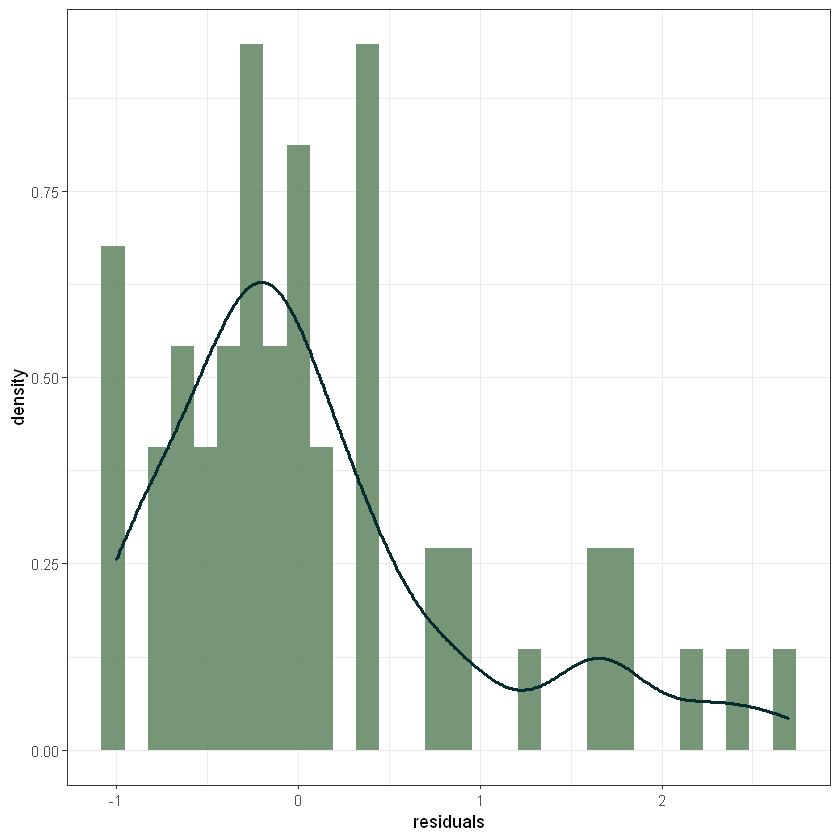

In [10]:
Fit_Po <-glm(Nt~.,data=Variable_KS_df[,c(col_y,col_X_02)],family=poisson())
summary(Fit_Po) #查看回归模型参数
pdf_plot(Fit_Po$residuals)+xlab('residuals')